In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

%matplotlib inline 

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


0

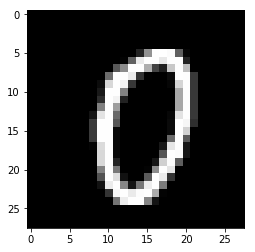

In [6]:
plt.imshow(x_train[1000], cmap = "gray") 
y_train[1000]

In [7]:
x_train.min(), x_train.max()

(0, 255)

In [8]:
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
y_train_oh[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
modelo = Sequential()
modelo.add(Flatten(input_shape = (28,28))) 
modelo.add(Dense(256, activation="relu")) 
modelo.add(Dense(128, activation="relu"))
modelo.add(Dense(10, activation="softmax"))

modelo.summary() 
modelo.compile(optimizer= "adam", loss = 'categorical_crossentropy', metrics=['accuracy'])

modelo.fit(x_train/255, y_train_oh, batch_size= 32, epochs= 1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
60000/60000 [==============================] - 27s 443us/step - loss: 0.2079 - acc: 0.9388


In [26]:
modelo.evaluate(x_test/255, y_test_oh)

10000/10000 [==============================] - 2s 236us/step


[0.10051855630073696, 0.9683]

In [28]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding= 'same', activation= "relu", input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding= 'same', activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
model.add(Flatten())
model.add(Dense(units = 32, activation= 'relu'))
model.add(Dense(units = 10, activation= 'softmax'))

model.summary()

model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

model.fit(np.expand_dims(x_train, axis=3)/255, y_train_oh, batch_size= 32, epochs= 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                50208     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total para

In [29]:
model.evaluate(np.expand_dims(x_test, axis=3)/255, y_test_oh)

10000/10000 [==============================] - 3s 281us/step


[0.0627270102262497, 0.98]